In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('INvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [3]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
df.isnull().any() #To check the null values in a particular column

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [5]:
df["description"] = df["description"].fillna(value = '0') # Here we are replacing the null value with 0

In [6]:
df["description"].isnull().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [8]:
# Which year was data got collected 
df["trending_date"]

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
37347    18.14.06
37348    18.14.06
37349    18.14.06
37350    18.14.06
37351    18.14.06
Name: trending_date, Length: 37352, dtype: object

In [10]:
cdf = df["trending_date"].apply(lambda x: "20"+x[:2]).value_counts().to_frame().reset_index().rename(columns = {"index":"year","trending_date":"no_of_videos"})
cdf

,year,no_of_videos
0,2018,28293
1,2017,9059


<BarContainer object of 2 artists>

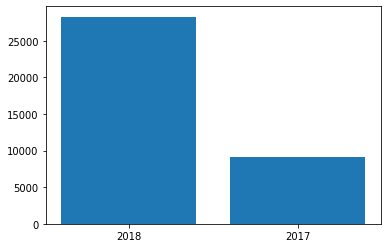

In [11]:
# BAr chart

plt.bar(cdf['year'],cdf['no_of_videos'])


In [12]:
# What is the percentage of videos released in that particular year

df['trending_date'].apply(lambda x:'20'+x[:2]).value_counts(normalize = True)*100

2018    75.746948
2017    24.253052
Name: trending_date, dtype: float64

In [13]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


array([[<AxesSubplot:title={'center':'views'}>]], dtype=object)

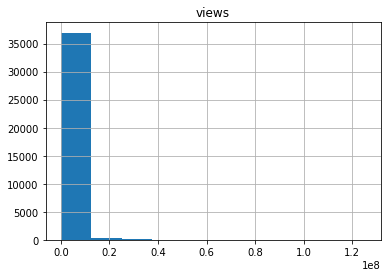

In [14]:
df.hist('views')

In [15]:
# we need to check the videos less than 1m views
# and To check the percentage of the videos below 1m views [we get 79%]

df[df['views']<1e6]['views'].count()/df['views'].count()*100

79.56735917755408

In [16]:
# Percentage of videos with >50k likes

df[df['likes']>50000]['likes'].count()/df['likes'].count()*100

10.583101306489612

In [17]:
# description of non-numerical columns

df.describe(include = 'O')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,37352
unique,16307,205,16721,1426,16339,12578,16523,13993
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,0
freq,511,200,19,284,18,1381,16,561


In [18]:
# To find the lenght of the title

df['title_lenght'] = df['title'].apply(lambda x : len(x))

In [19]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'title_lenght'],
      dtype='object')

<AxesSubplot:>

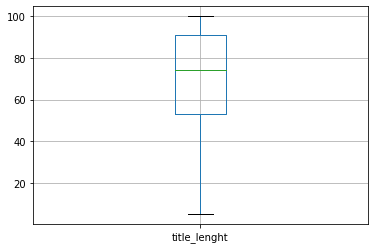

In [20]:
df.boxplot('title_lenght')

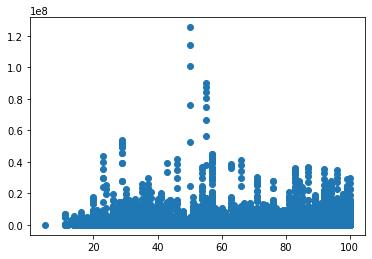

In [21]:
plt.scatter(df['title_lenght'],df['views'])

In [22]:
#Co-relation and Group by 

df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_lenght
category_id,1.000000,-0.183215,-0.127600,-0.042450,-0.036223,0.038928,0.057953,-0.053865,-0.162416
views,-0.183215,1.000000,0.850096,0.543294,0.674195,-0.034227,-0.034364,0.004976,-0.050850
likes,-0.127600,0.850096,1.000000,0.494560,0.780514,-0.045624,-0.040741,0.028464,-0.168641
dislikes,-0.042450,0.543294,0.494560,1.000000,0.708125,-0.011821,-0.015136,0.002985,-0.029929
comment_count,-0.036223,0.674195,0.780514,0.708125,1.000000,-0.032860,-0.024210,0.015771,-0.117920
comments_disabled,0.038928,-0.034227,-0.045624,-0.011821,-0.032860,1.000000,0.354718,-0.003132,0.088516
ratings_disabled,0.057953,-0.034364,-0.040741,-0.015136,-0.024210,0.354718,1.000000,-0.002508,0.052120
video_error_or_removed,-0.053865,0.004976,0.028464,0.002985,0.015771,-0.003132,-0.002508,1.000000,-0.032605
title_lenght,-0.162416,-0.050850,-0.168641,-0.029929,-0.117920,0.088516,0.052120,-0.032605,1.000000


In [24]:
df.groupby('category_id').sum()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_lenght
category_id,,,,,,,,
1,3847149504,69241553,4315081,5789446,71,11,11,120611
2,30384725,539571,22284,86488,9,2,0,5304
10,10150844485,254328536,15030992,17595070,7,8,0,328268
15,4879743,362534,6488,42056,0,0,0,147
17,1379949159,32969986,1316379,2717679,8,10,0,51521
19,1374342,16939,616,2448,0,0,0,545
20,274722506,6707728,341616,623839,0,0,0,2934
22,1364104242,23194729,1728388,2661920,163,107,0,182898
23,2887672070,174114686,6976508,13806968,0,0,0,179028


<BarContainer object of 37352 artists>

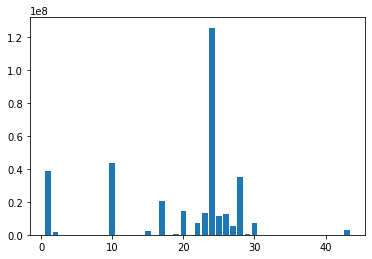

In [25]:
plt.bar(df['category_id'], df['views'])

<BarContainer object of 37352 artists>

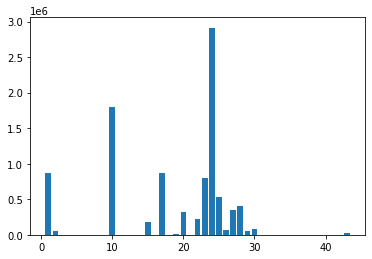

In [26]:
plt.bar(df['category_id'], df['likes'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [28]:
# How many videos got removed or had some error 
df['video_error_or_removed'].value_counts()

False    37341
True        11
Name: video_error_or_removed, dtype: int64

In [30]:
# Percentage of videos on comment disables

df['comments_disabled'].value_counts(normalize = True)*100

False    96.776612
True      3.223388
Name: comments_disabled, dtype: float64

In [31]:
# percentage of videos on rating disable
df['ratings_disabled'].value_counts(normalize = True)*100

False    97.909081
True      2.090919
Name: ratings_disabled, dtype: float64

In [33]:
# How many vidoes have both commnet and rating disable

len(df[(df['comments_disabled']== True) & (df['ratings_disabled']== True).index])

588

In [43]:
df['views'].count()

37352

In [46]:
df['likes'].value_counts().head()

0      781
253     23
238     21
289     21
227     21
Name: likes, dtype: int64